In [1]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#pip install wordcloud
#conda install -c conda-forge wordcloudimport re
from PIL import Image
from wordcloud import WordCloud
from collections import Counter

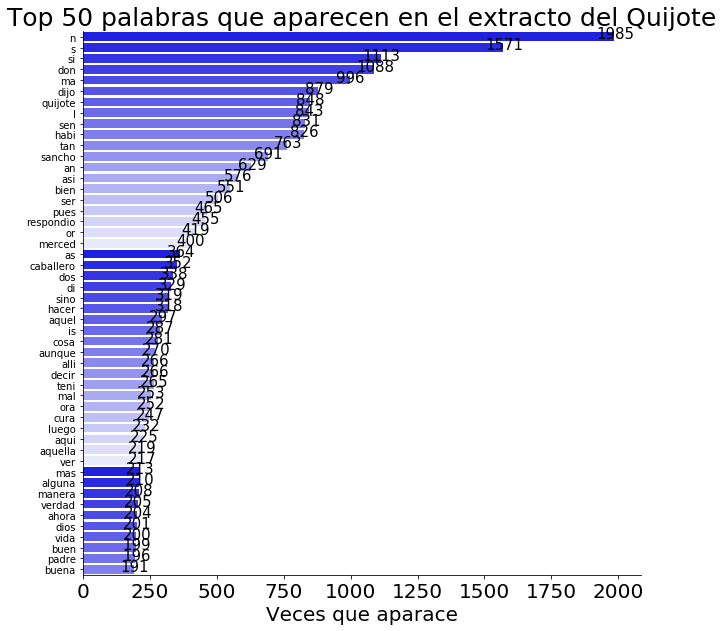

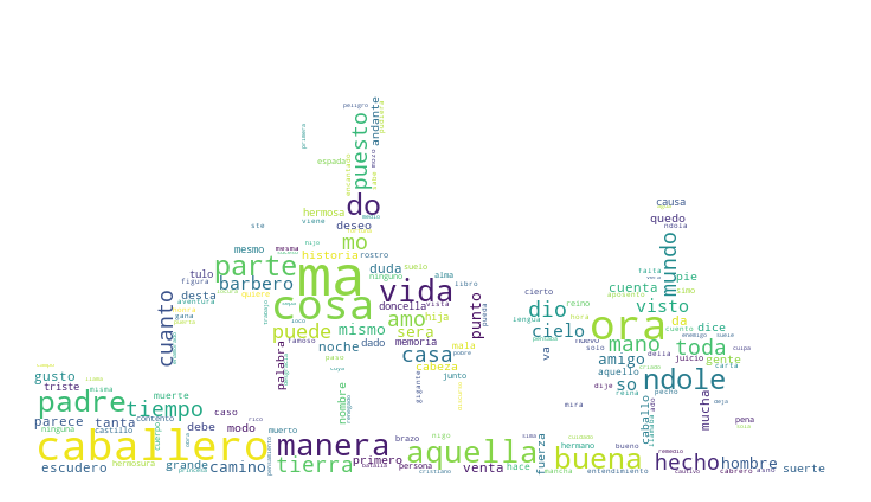

In [27]:
names = ['tweet']
palabras = pd.read_csv('el_quijote.txt', sep='\t',names=names)
palabras['tweet2'] = palabras.tweet.str.strip().str.split('[\W_]+')
rows = list()
for row in palabras[['tweet2']].iterrows():
    r = row[1]
    for word in r.tweet2:
        rows.append((word))

tweet2 = pd.DataFrame(rows, columns=['tweet2'])
tweet2.head()

tweet2 = tweet2[tweet2.tweet2.str.len() > 0]
tweet2['tweet2'] = tweet2.tweet2.str.lower()
tweet2.head()

counts = tweet2\
    .tweet2.value_counts()\
    .to_frame()\
    .rename(columns={'tweet2':'n_w'})
counts.head(15)

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

for a_stopword in stopwords:
    if a_stopword in counts.index:
        counts = counts.drop(a_stopword)
counts.head(20)

top_20 = counts.head(50)
top_20

import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x="n_w", y=top_20.index, data=top_20, palette=sns.light_palette("blue", n_colors=20, reverse=True))
plt.ylabel("")
plt.xlabel('Veces que aparace', fontsize=20)
plt.title('Top 50 palabras que aparecen en el extracto del Quijote', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3  ,
            p.get_y() + p.get_height()/1.4,
            "%d" % width,
            ha="center", fontsize=15)
sns.despine()
plt.savefig('palabras_populares.jpg')
plt.plot();

top_five_words = counts.head(5).index
top_five_words


comment_words = ' '
for val in counts.index:       
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

trump_mask = np.array(Image.open("book.jpg"))

wordcloud = WordCloud(width = 1800, height = 1800, 
                background_color ='white', 
                stopwords = stopwords, 
                mask=trump_mask,
                min_font_size = 5).generate(comment_words)  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 